# Import

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib
from datetime import date, timedelta, datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
resale = pd.read_csv("resale-flat-prices/resale(2010).csv", parse_dates=["month", "lease_commence_date"])

In [ ]:
eda_df = resale[["month", "flat_type", "floor_area_sqm", "lease_commence_date", "remaining_years", 
                 "storey_coded", "Region", "town", "resale_price", "count_nearby_mrt", "count_nearby_hawker", 
                 "count_nearby_park", "count_nearby_school", "count_nearby_supermarket"]]

# Variable/Predictor Analysis

In [ ]:
eda_df.head()

,month,flat_type,floor_area_sqm,lease_commence_date,remaining_years,storey_coded,Region,town,resale_price,count_nearby_mrt,count_nearby_hawker,count_nearby_park,count_nearby_school,count_nearby_supermarket
0,2010-02-01,3 ROOM,73.0,1976-01-01,64.847327,1,RCR,ANG MO KIO,293000.0,1,5,3,4,8
1,2010-03-01,3 ROOM,73.0,1976-01-01,64.770666,1,RCR,ANG MO KIO,288000.0,1,5,3,4,8
2,2010-07-01,3 ROOM,73.0,1976-01-01,64.436641,1,RCR,ANG MO KIO,300000.0,1,5,3,4,8
3,2010-07-01,4 ROOM,88.0,1976-01-01,64.436641,2,RCR,ANG MO KIO,332000.0,1,5,3,4,8
4,2010-09-01,4 ROOM,88.0,1976-01-01,64.266891,3,RCR,ANG MO KIO,398000.0,1,5,3,4,8


## Variable distribution

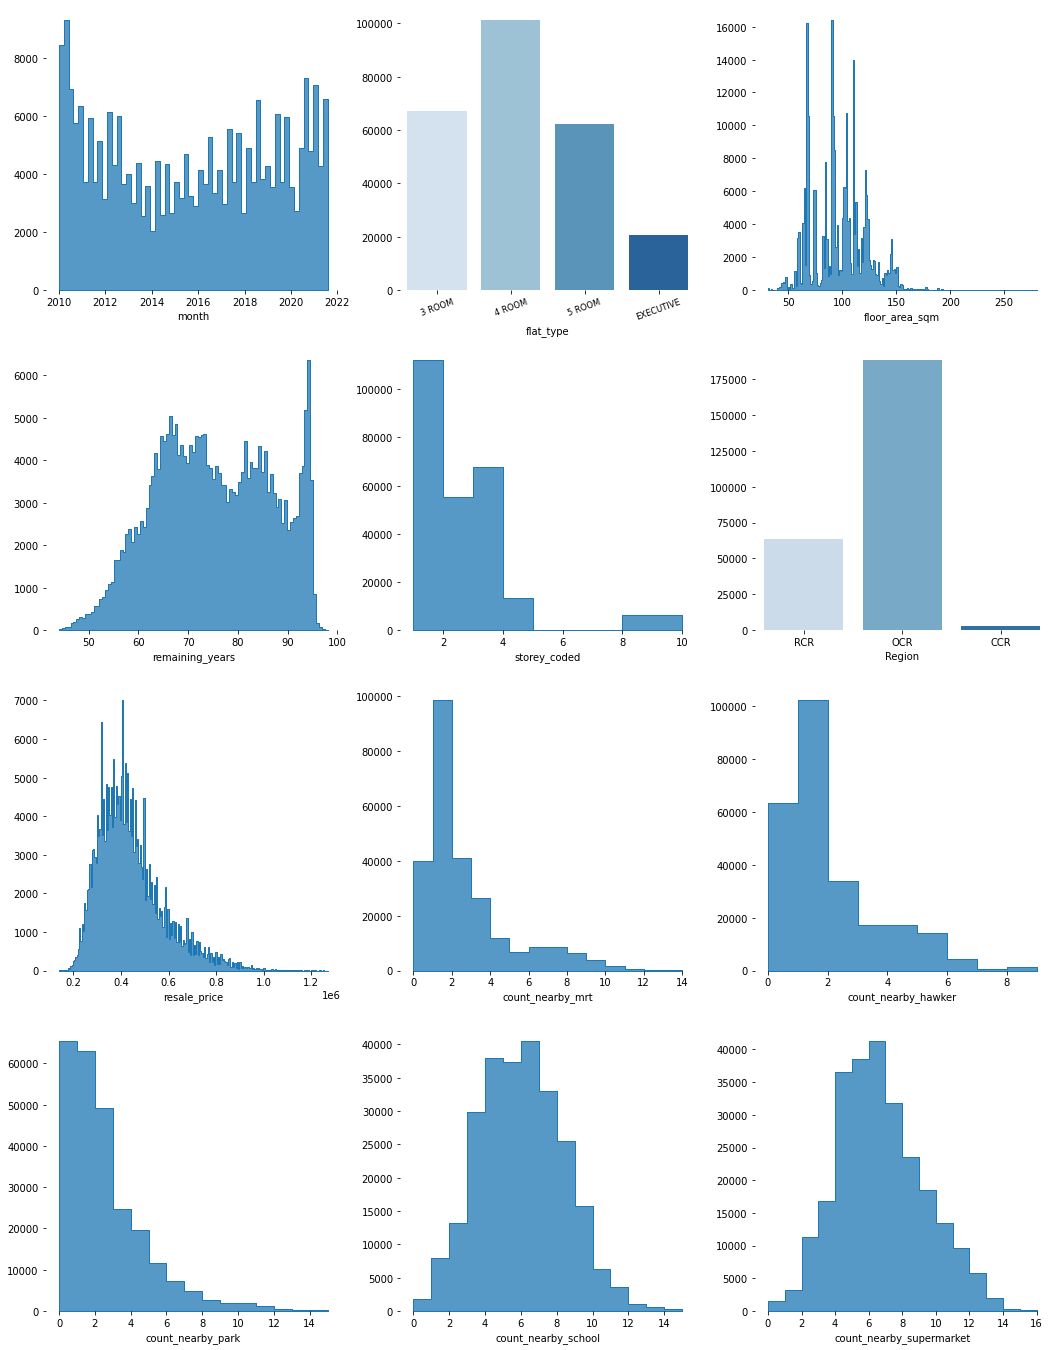

In [ ]:
#EDA for count of each variable
col_names = ["month", "flat_type", "floor_area_sqm", "remaining_years", 
            "storey_coded", "Region", "resale_price", "count_nearby_mrt", "count_nearby_hawker", 
            "count_nearby_park", "count_nearby_school", "count_nearby_supermarket"]
dm = 0
fig, axes = plt.subplots(4, 3, figsize = [18,24])
for col in col_names:
    if col == "flat_type":
        lst = ["3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE"]
        sns.countplot(ax = axes[dm//3, dm%3], x = eda_df[col], palette = "Blues", order = lst)
    elif col == "Region":
        sns.countplot(ax = axes[dm//3, dm%3], x = eda_df[col], palette = "Blues")
    elif "count" in col or col == "storey_coded":
        lst = sorted(list(set(eda_df[col])))
        sns.histplot(ax = axes[dm//3, dm%3], x = eda_df[col], element="step", bins = lst)
    else:
        sns.histplot(ax = axes[dm//3, dm%3], x = eda_df[col], element="step")
    axes[dm//3][dm%3].set_ylabel('') 
    dm += 1
axes[0][1].tick_params(axis='x', rotation=20, labelsize = "small")
sns.despine(left=True, bottom=True)

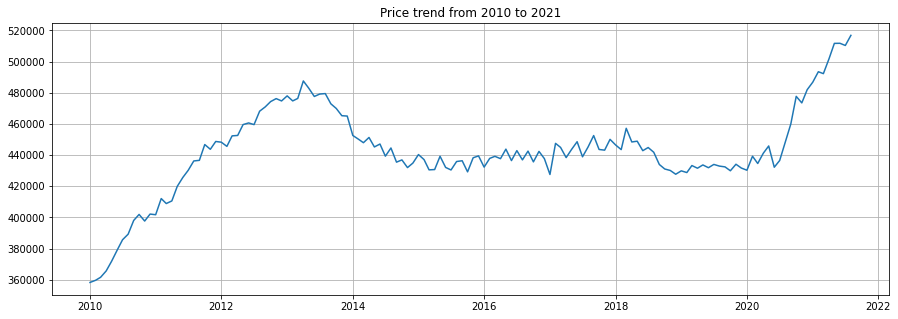

In [ ]:
#price trend
fig, ax = plt.subplots(figsize = [15,5])
df_month = eda_df.groupby(by=['month']).agg('mean')
df_month = df_month[["resale_price"]].reset_index()
plt.plot(df_month.month, df_month.resale_price)
plt.title("Price trend from 2010 to 2021")
plt.grid()

## Correlation with price


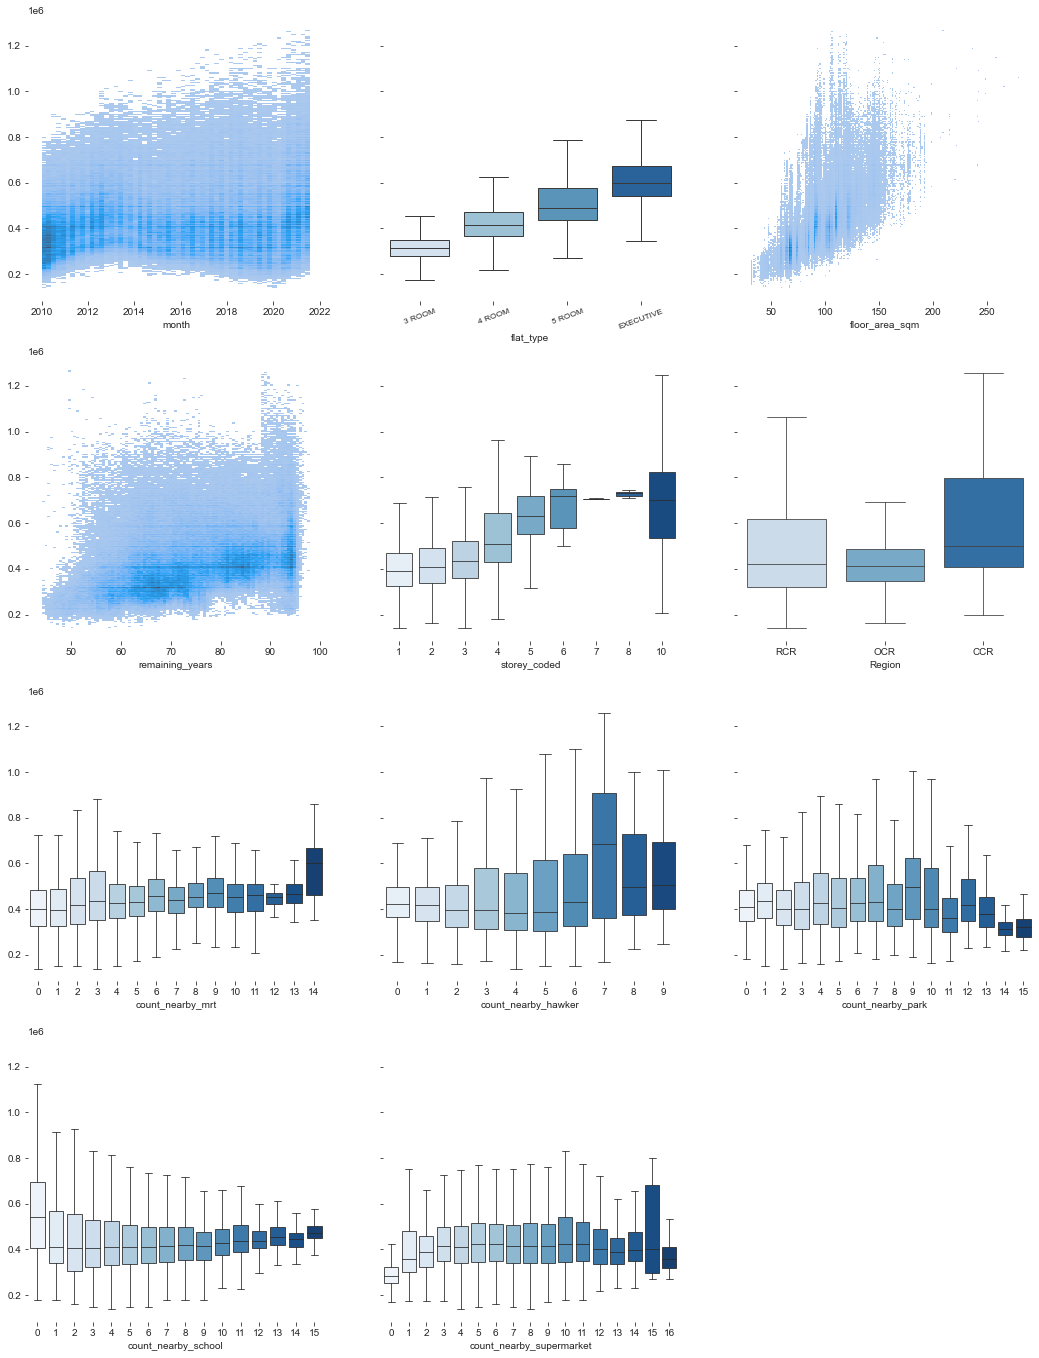

In [ ]:
#Check correlation with price
dm = 0
fig, axes = plt.subplots(4, 3, figsize = [18,24], sharey = True)
col_names = ["month", "flat_type", "floor_area_sqm", "remaining_years", 
            "storey_coded", "Region", "count_nearby_mrt", "count_nearby_hawker", 
            "count_nearby_park", "count_nearby_school", "count_nearby_supermarket"]
for col in col_names:
    if col == "flat_type":
        lst = ["3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE"]
        sns.boxplot(ax = axes[dm//3, dm%3], x = eda_df[col], y = eda_df.resale_price, 
                    palette = "Blues", order = lst, showfliers = False, linewidth = 1)
    elif "count" in col or col == "storey_coded" or col == "Region":
        sns.boxplot(ax = axes[dm//3, dm%3], x = eda_df[col], y = eda_df.resale_price, 
                    palette = "Blues", showfliers = False, linewidth = 0.8)
    else:
        sns.histplot(ax = axes[dm//3, dm%3], x = eda_df[col], y = eda_df.resale_price)
    axes[dm//3][dm%3].set_ylabel('') 
    dm += 1
axes[0][1].tick_params(axis='x', rotation=20, labelsize = "small")
fig.delaxes(axes[3][2])
sns.despine(left=True, bottom=True)
fig.savefig('temp.png', transparent=True)

/Users/zhouentong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


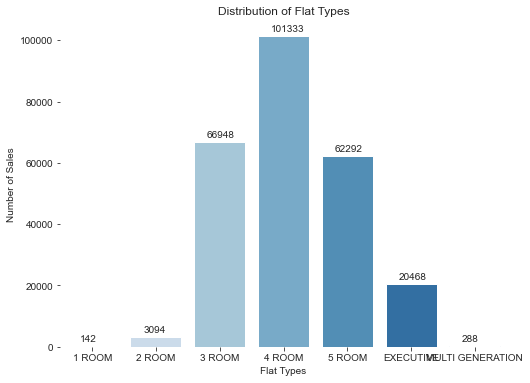

In [ ]:
#flat type distribution
plt.figure(figsize=(8,6))
lst = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTI GENERATION"]
ax = sns.countplot(eda_df.flat_type, palette = "Blues", order = lst, linewidth = 1)
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Types')
plt.ylabel('Number of Sales')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+1500))

sns.despine(left=True, bottom=True)

## Individual plots

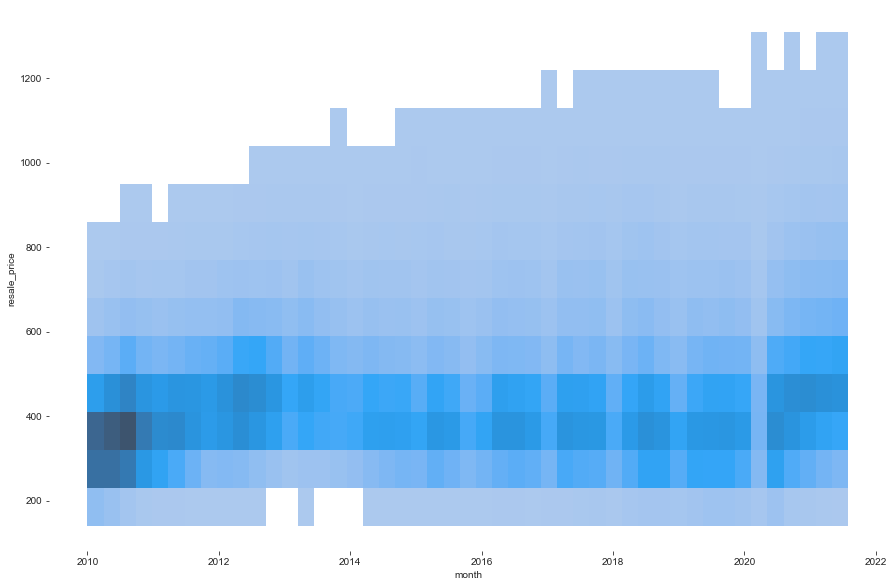

In [ ]:
fig, ax = plt.subplots(figsize = [15,10])
col_names = ["month", "flat_type", "floor_area_sqm", "remaining_years", 
            "storey_coded", "Region", "count_nearby_mrt", "count_nearby_hawker", 
            "count_nearby_park", "count_nearby_school", "count_nearby_supermarket"]
col_names = ["month"]
for col in col_names:
    if col == "flat_type":
        lst = ["3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE"]
        sns.boxplot( x = eda_df[col], y = eda_df.resale_price, 
                    palette = "Blues", order = lst, showfliers = False, linewidth = 1)
    elif "count" in col or col == "storey_coded" or col == "Region":
        sns.boxplot(x = eda_df[col], y = eda_df.resale_price, 
                    palette = "Blues", showfliers = False, linewidth = 0.8)
    else:
        sns.histplot(x = eda_df[col], y = eda_df.resale_price/1000, binwidth = 90)

# axes[0][1].tick_params(axis='x', rotation=20, labelsize = "small")
# fig.delaxes(axes[3][2])
sns.despine(left=True, bottom=True)

## Correlation across variables

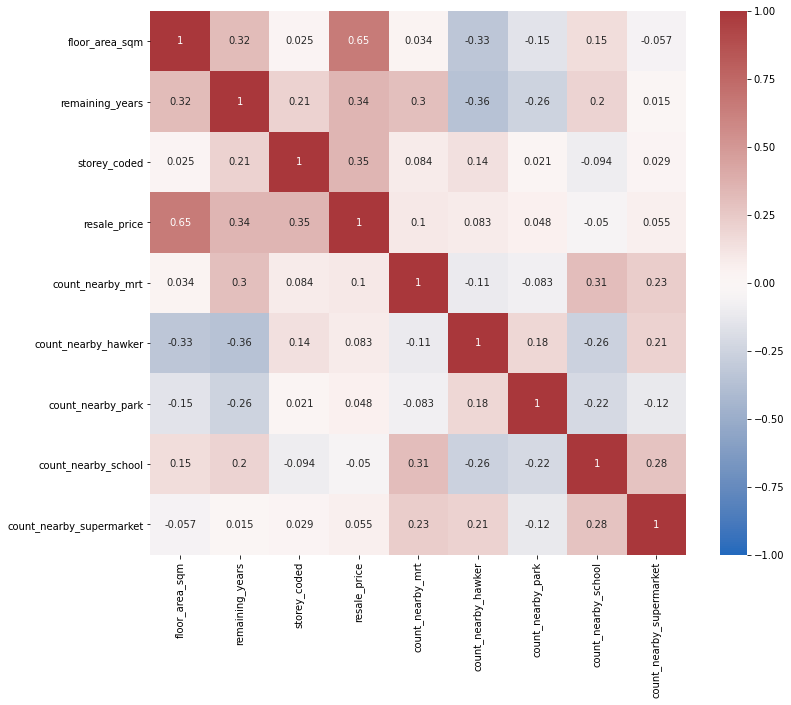

In [ ]:
#Correlation matrix
fig, ax = plt.subplots(figsize = [12,10])
correlation_mat = eda_df.corr()
sns.heatmap(correlation_mat, annot = True, vmin=-1, vmax=1, cmap = "vlag")
plt.show()

# Time Series Analysis

## Price trend with different flat types

In [ ]:
overall_price = eda_df.groupby('month').agg('mean')[['resale_price']]
overall_price.resale_price

month
2010-01-01    358286.950516
2010-02-01    359668.784143
2010-03-01    361600.379226
2010-04-01    365676.429146
2010-05-01    371857.549725
2010-06-01    378998.206134
2010-07-01    385689.946678
2010-08-01    389250.462650
2010-09-01    398078.239866
2010-10-01    401935.700679
2010-11-01    397692.332576
2010-12-01    402171.509618
2011-01-01    401744.280867
2011-02-01    412116.182535
2011-03-01    408928.557826
2011-04-01    410600.372398
2011-05-01    419918.808311
2011-06-01    425648.515573
2011-07-01    430256.714656
2011-08-01    436259.191526
2011-09-01    436649.789444
2011-10-01    446781.942308
2011-11-01    443744.313399
2011-12-01    448756.550318
2012-01-01    448294.792716
2012-02-01    445616.055453
2012-03-01    452358.314465
2012-04-01    452622.605863
2012-05-01    459599.161708
2012-06-01    460651.584493
2012-07-01    459580.958453
2012-08-01    468182.297349
2012-09-01    470934.237674
2012-10-01    474340.714371
2012-11-01    476266.959007
2012-12-01    

<ipython-input-33-f6d628296b0c>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


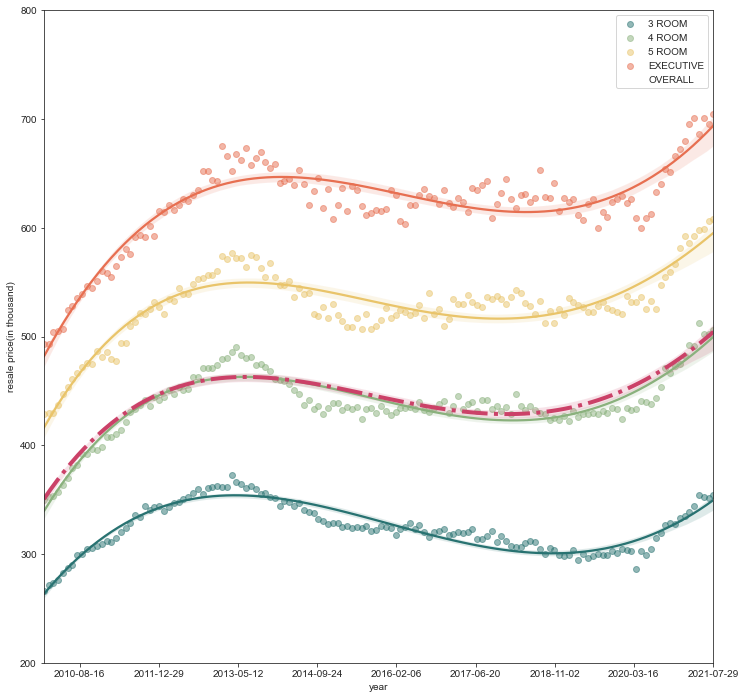

In [ ]:
eda_df_flat = eda_df.groupby(by=['month', "flat_type"]).agg('mean')
eda_df_flat = eda_df_flat[["resale_price"]].unstack().reset_index()

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(12, 12))
pal = ["#23404b","#264653","#287271","#2a9d8f","#8ab17d","#babb74","#e9c46a","#f4a261","#e76f51"]
j=2
for i,col in enumerate(eda_df_flat.columns[1:]):
    if col[1] in ["1 ROOM", "2 ROOM", "MULTI GENERATION"]:
        continue
    sns.regplot(x=eda_df_flat["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_flat[col]/1000, 
                label = eda_df_flat.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                order = 4, 
                color = pal[j])
    j += 2

sns.regplot(x = eda_df_flat["month"].apply(lambda date: date.toordinal()),
            y = overall_price.resale_price/1000,
            label = "OVERALL", 
            scatter_kws={'alpha':0.5},
            marker = "",
            order = 4,
            color = "#cb4168",
            line_kws={'linewidth':4, 'linestyle': "-."})

#price change for different flat type
ax.legend()
ax.set(xlabel='year', ylabel='resale price(in thousand)', ylim = [200, 800])
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()

### Price per sqm

<ipython-input-34-e2078d52e10e>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


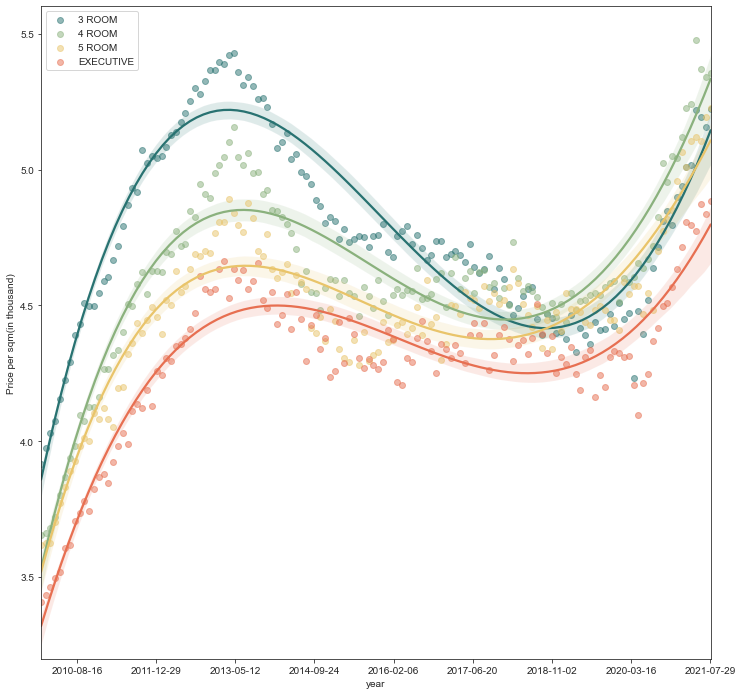

In [ ]:
temp = eda_df.copy()
temp["price_per_sqm"] = temp.resale_price / temp.floor_area_sqm
temp.groupby(by=['month', "flat_type"]).agg('mean')
eda_df_pps = eda_df.copy()
eda_df_pps["price_per_sqm"] = eda_df_pps.resale_price / eda_df_pps.floor_area_sqm
eda_df_pps = eda_df_pps.groupby(by=['month', "flat_type"]).agg('mean')
eda_df_pps = eda_df_pps[["price_per_sqm"]].unstack().reset_index()

fig, ax = plt.subplots(figsize=(12, 12))

j = 2
for i,col in enumerate(eda_df_pps.columns[1:]):
    if col[1] in ["1 ROOM", "2 ROOM", "MULTI GENERATION"]:
        continue
    sns.regplot(x=eda_df_pps["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_pps[col]/1000, 
                label = eda_df_pps.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                order = 4, 
                color = pal[j])
    j += 2
#price per sqm change for different flat type
ax.legend()
ax.set(xlabel='year', ylabel='Price per sqm(in thousand)', ylim = [3.2, 5.6])
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()

## Price trend for different storey

Higher floor, higher price

<ipython-input-14-7aa9c0407fd0>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


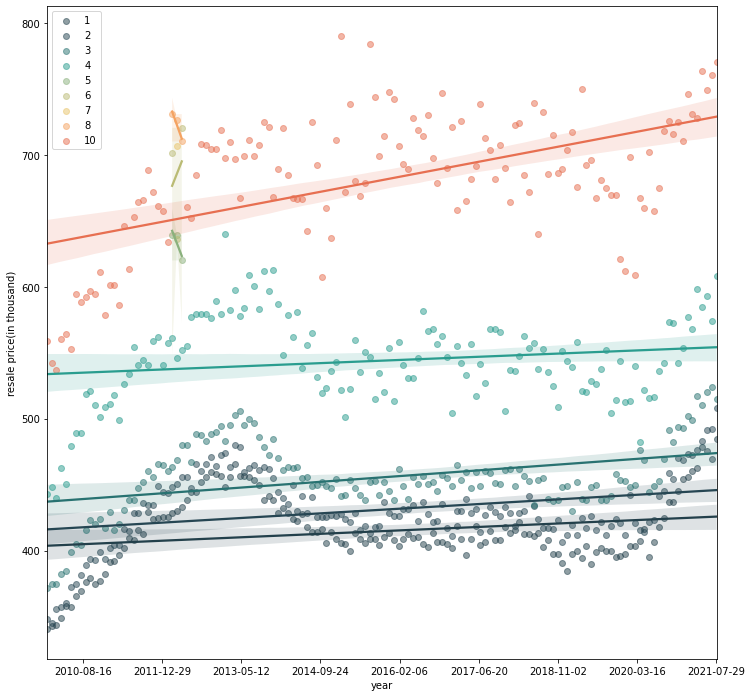

In [ ]:
eda_df_storey = eda_df.groupby(by=['month', "storey_coded"]).agg('mean')

eda_df_storey = eda_df_storey[["resale_price"]].unstack().reset_index()

### PLOT BUILD
fig, ax = plt.subplots(figsize=(12, 12))
for i,col in enumerate(eda_df_storey.columns[1:]):
    sns.regplot(x=eda_df_storey["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_storey[col]/1000, 
                label = eda_df_storey.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                order = 1, 
                color = pal[i])

ax.legend()
ax.set(xlabel='year', ylabel='resale price(in thousand)')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()

## Price trend by town

Can select a few interesting towns

<ipython-input-15-757242d02acd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


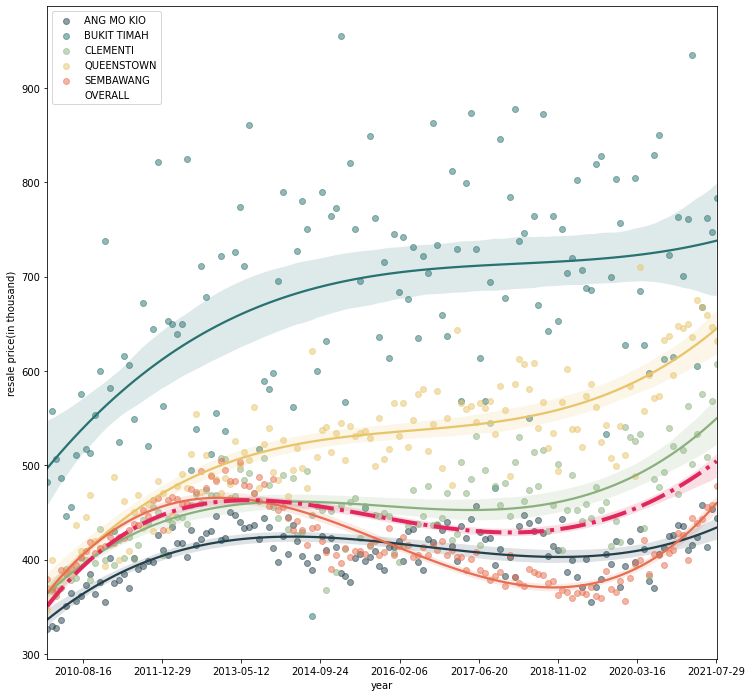

In [ ]:
eda_df_town = eda_df.groupby(by=['month', "town"]).agg('mean')
eda_df_town = eda_df_town[["resale_price"]].unstack().reset_index()

fig, ax = plt.subplots(figsize=(12, 12))
towns = ["BUKIT TIMAH", "ANG MO KIO", "QUEENSTOWN", "SEMBAWANG", "CLEMENTI", "SEMBAWANG"]
k = 0
for i,col in enumerate(eda_df_town.columns[1:]):
    if col[1] not in towns:
        continue
    sns.regplot(x=eda_df_town["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_town[col]/1000, 
                label = eda_df_town.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                marker = "o",
                order = 3, 
                color = pal[k*2])
    k += 1

sns.regplot(x = eda_df_flat["month"].apply(lambda date: date.toordinal()),
            y = overall_price.resale_price/1000,
            label = "OVERALL", 
            scatter_kws={'alpha':0.5},
            marker = "",
            order = 4,
            color = "#e2275c",
            line_kws={'linewidth':4, 'linestyle': "-."})

#price change for a certain towns
ax.legend()
ax.set(xlabel='year', ylabel='resale price(in thousand)')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()

## Price trend by region

OCR and RCR price is going up

<ipython-input-16-437bc02d4a84>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


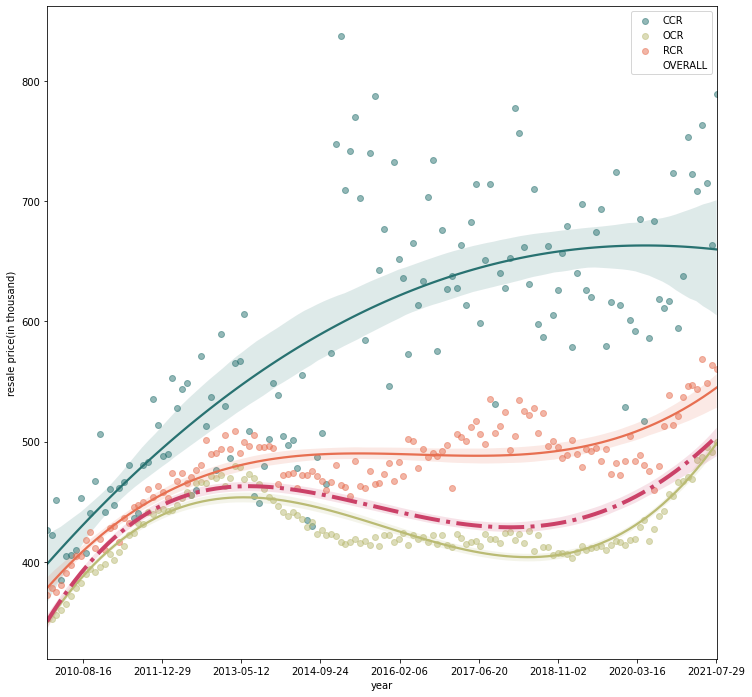

In [ ]:
eda_df_region = eda_df.groupby(by=['month', "Region"]).agg('mean')
eda_df_region = eda_df_region[["resale_price"]].unstack().reset_index()

fig, ax = plt.subplots(figsize=(12, 12))

for i,col in enumerate(eda_df_region.columns[1:]):
    sns.regplot(x=eda_df_region["month"].apply(lambda date: date.toordinal()), 
                y=eda_df_region[col]/1000, 
                label = eda_df_region.columns.values[i+1][1],
                scatter_kws={'alpha':0.5}, 
                order = 3, 
                color = pal[i*3+2])

sns.regplot(x = eda_df_flat["month"].apply(lambda date: date.toordinal()),
            y = overall_price.resale_price/1000,
            label = "OVERALL", 
            scatter_kws={'alpha':0.5},
            marker = "",
            order = 4,
            color = "#cb4168",
            line_kws={'linewidth':4, 'linestyle': "-."})

ax.legend()
ax.set(xlabel='year', ylabel='resale price(in thousand)')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.show()

# Clusters price distribution

In [ ]:
cluster = pd.read_csv("resale-flat-prices/cluster_1.csv")
cluster

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,remaining_years,storey_coded,district,Region,addr,lat,long,nearby_mrt,nearby_park,nearby_school,nearby_hawker,nearby_supermarket,count_nearby_mrt,count_nearby_park,count_nearby_hawker,count_nearby_school,count_nearby_supermarket,label
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,improved,1979-01-01,232000.0,13880 days,60.932120,0,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.853880,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,2,3,2,3,2
1,2017-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,improved,1979-01-01,235000.0,14000 days,60.603572,0,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.853880,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,2,3,2,3,2
2,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,improved,1979-01-01,202000.0,14304 days,59.771248,1,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.853880,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,2,3,2,3,2
3,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,improved,1979-01-01,210000.0,14304 days,59.771248,1,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.853880,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,2,3,2,3,2
4,2018-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,improved,1979-01-01,220000.0,14365 days,59.604236,3,20,RCR,406 ANG MO KIO AVE 10,1.362005,103.853880,[],"['Tai Hwan Terrace Playground', 'Bishan-Ang Mo...","['DEYI SECONDARY SCHOOL', 'TOWNSVILLE PRIMARY ...",['Ang Mo Kio Ave 1 Blk 341 (Teck Ghee Court) '...,"['G8 MART PTE. LTD. ', 'COLD STORAGE SINGAPORE...",0,2,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105577,2021-08-01,YISHUN,3 ROOM,507A,YISHUN AVE 4,10 TO 12,68.0,model a,2018-01-01,380000.0,1308 days,95.353087,0,27,OCR,507A YISHUN AVE 4,1.415288,103.839847,['KHATIB MRT STATION'],[],"['CHUNG CHENG HIGH SCHOOL (YISHUN)', 'NAVAL BA...",[],"['SHENG SIONG SUPERMARKET PTE LTD ', 'NTUC FAI...",1,0,0,5,7,1
105578,2021-08-01,YISHUN,4 ROOM,507A,YISHUN AVE 4,07 TO 09,93.0,model a,2018-01-01,490000.0,1308 days,95.353087,3,27,OCR,507A YISHUN AVE 4,1.415288,103.839847,['KHATIB MRT STATION'],[],"['CHUNG CHENG HIGH SCHOOL (YISHUN)', 'NAVAL BA...",[],"['SHENG SIONG SUPERMARKET PTE LTD ', 'NTUC FAI...",1,0,0,5,7,1
105579,2021-08-01,YISHUN,3 ROOM,512B,YISHUN ST 51,10 TO 12,68.0,model a,2017-01-01,365000.0,1673 days,94.353751,0,27,OCR,512B YISHUN ST 51,1.414707,103.842112,[],[],"['CHUNG CHENG HIGH SCHOOL (YISHUN)', 'NAVAL BA...",[],"['SHENG SIONG SUPERMARKET PTE LTD ', 'NTUC FAI...",0,0,0,5,6,2
105580,2021-08-01,YISHUN,4 ROOM,506B,YISHUN AVE 4,01 TO 03,93.0,model a,2018-01-01,462000.0,1308 days,95.353087,1,27,OCR,506B YISHUN AVE 4,1.415819,103.840679,['KHATIB MRT STATION'],['Yishun Park'],"['CHUNG CHENG HIGH SCHOOL (YISHUN)', 'NAVAL BA...",[],"['SHENG SIONG SUPERMARKET PTE LTD ', 'NTUC FAI...",1,1,0,5,7,1


Text(0, 0.5, 'Resale Price (in thousands)')

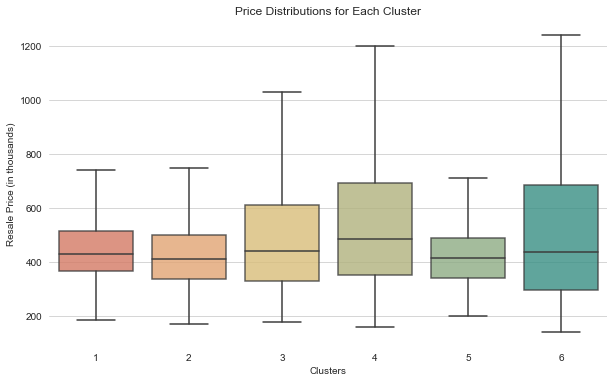

In [ ]:
pal = ["#23404b","#264653","#287271","#2a9d8f","#8ab17d","#babb74","#e9c46a","#f4a261","#e76f51"]
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x = cluster.label, y = cluster.resale_price/1000, palette = pal[::-1], 
            showfliers = False,
            boxprops={"alpha":0.8})
sns.despine(left=True, bottom=True)
#Price distribution of each cluster
plt.title('Price Distributions for Each Cluster')
plt.xlabel('Clusters')
plt.ylabel('Resale Price (in thousands)')

In [ ]:
cls_temp = cluster.groupby(by=['label']).agg('mean')
cls_temp = cls_temp[["floor_area_sqm", "resale_price", "remaining_years", "count_nearby_mrt", "count_nearby_park", "count_nearby_hawker", "count_nearby_school", "count_nearby_supermarket"]]
cls_temp = cls_temp.round(0).astype(int)
cls_temp.to_csv("cluster.csv")